In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [40]:
df_synth = pd.read_csv("/media/viktor/T7/gravitational-waves-kaggle-2022/datasets/dataset-v1/data.csv")
df_2 = pd.read_csv("/media/viktor/T7/gravitational-waves-kaggle-2022/datasets/dataset-v2/data.csv")
# concatenate the two dataframes
df_synth = pd.concat([df_synth, df_2], ignore_index=True)

df_test = pd.read_csv("/media/viktor/T7/gravitational-waves-kaggle-2022/kaggle-data/preprocessed/test-preprocessed.csv")
df_test["preprocessed_filename"] = df_test["preprocessed_filename"].apply(lambda x: x.replace("/media/viktor/T7/gravitational-waves-kaggle-2022", "/media/viktor/T7/gravitational-waves-kaggle-2022/kaggle-data/preprocessed"))
# rename "preprocessed_filename" to "file"
df_test.rename(columns={"preprocessed_filename": "file"}, inplace=True)
df_test

,Unnamed: 0,filename,name,file
0,0,/media/viktor/T7/gravitational-waves-kaggle-20...,00054c878,/media/viktor/T7/gravitational-waves-kaggle-20...
1,1,/media/viktor/T7/gravitational-waves-kaggle-20...,0007285a3,/media/viktor/T7/gravitational-waves-kaggle-20...
2,2,/media/viktor/T7/gravitational-waves-kaggle-20...,00076c5a6,/media/viktor/T7/gravitational-waves-kaggle-20...
3,3,/media/viktor/T7/gravitational-waves-kaggle-20...,001349290,/media/viktor/T7/gravitational-waves-kaggle-20...
4,4,/media/viktor/T7/gravitational-waves-kaggle-20...,001a52e92,/media/viktor/T7/gravitational-waves-kaggle-20...
...,...,...,...,...
7970,7970,/media/viktor/T7/gravitational-waves-kaggle-20...,ffbce04ef,/media/viktor/T7/gravitational-waves-kaggle-20...
7971,7971,/media/viktor/T7/gravitational-waves-kaggle-20...,ffc2d976b,/media/viktor/T7/gravitational-waves-kaggle-20...
7972,7972,/media/viktor/T7/gravitational-waves-kaggle-20...,ffc905909,/media/viktor/T7/gravitational-waves-kaggle-20...
7973,7973,/media/viktor/T7/gravitational-waves-kaggle-20...,ffe276f3e,/media/viktor/T7/gravitational-waves-kaggle-20...


In [120]:
# for 
# df_synth["file"].iloc[0]  is in format '/media/viktor/T7/gravitational-waves-kaggle-2022/datasets/dataset-v1/generated-data/signals/amplitudes_8336f0197_14.395423815568302_True.npy'. Make name column, which is 8336f0197
df_synth["name"] = df_synth["file"].apply(lambda x: x.split("/")[-1].split("_")[1])
df_synth

,file,label,depth,name
0,/media/viktor/T7/gravitational-waves-kaggle-20...,1,14.395424,8336f0197
1,/media/viktor/T7/gravitational-waves-kaggle-20...,0,16.763065,928c56d66
2,/media/viktor/T7/gravitational-waves-kaggle-20...,1,23.607238,503b4a64a
3,/media/viktor/T7/gravitational-waves-kaggle-20...,0,21.931825,85e04485c
4,/media/viktor/T7/gravitational-waves-kaggle-20...,0,9.933270,4817ab533
...,...,...,...,...
163995,/media/viktor/T7/gravitational-waves-kaggle-20...,0,30.794586,82d75e9ec
163996,/media/viktor/T7/gravitational-waves-kaggle-20...,0,23.115460,d0c51ff80
163997,/media/viktor/T7/gravitational-waves-kaggle-20...,0,28.559574,b0b623f5f
163998,/media/viktor/T7/gravitational-waves-kaggle-20...,0,30.402129,428817493


234e172c0
                                                     file  label      depth  \
31      /media/viktor/T7/gravitational-waves-kaggle-20...      0  15.392627   
1468    /media/viktor/T7/gravitational-waves-kaggle-20...      1  17.553485   
9017    /media/viktor/T7/gravitational-waves-kaggle-20...      0  17.553485   
12081   /media/viktor/T7/gravitational-waves-kaggle-20...      0  11.484478   
14651   /media/viktor/T7/gravitational-waves-kaggle-20...      0  14.920876   
16366   /media/viktor/T7/gravitational-waves-kaggle-20...      0  12.044747   
17412   /media/viktor/T7/gravitational-waves-kaggle-20...      1  20.627261   
20525   /media/viktor/T7/gravitational-waves-kaggle-20...      1  11.484478   
30477   /media/viktor/T7/gravitational-waves-kaggle-20...      0  16.725344   
33005   /media/viktor/T7/gravitational-waves-kaggle-20...      1  11.113627   
57302   /media/viktor/T7/gravitational-waves-kaggle-20...      1  14.920876   
57343   /media/viktor/T7/gravitational-wav

34it [00:00, 609.23it/s]


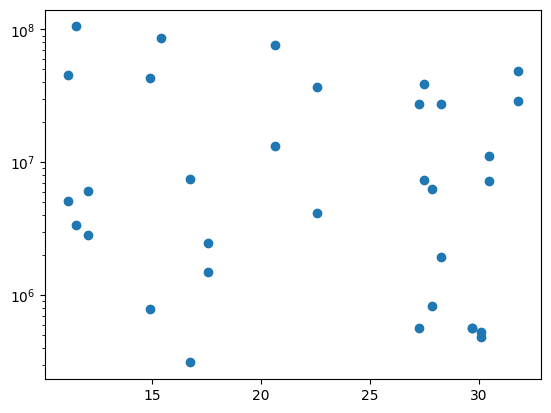

In [146]:
indx = 31
test_file = df_synth["name"][indx]
print(test_file)

x = np.load(df_synth["file"][indx])
test_hist, _ = np.histogram(x, bins=255, range=(0, 255))

df_subset = df_synth[df_synth["name"] == test_file]
print(df_subset)
depths = []
squared_diffs = []
for file, depth in tqdm(zip(df_subset["file"], df_subset["depth"])):
    x = np.load(file)
    # get the histogram of the signal, in bins of 1
    hist, bins = np.histogram(x, bins=255, range=(0, 255))
    squared_diff = np.sum((hist - test_hist) ** 2)
    squared_diffs.append(squared_diff)
    depths.append(depth)

plt.plot(depths, squared_diffs, "o")
plt.yscale("log")

57bd3c12b
                                                     file  label      depth  \
35      /media/viktor/T7/gravitational-waves-kaggle-20...      0  17.263831   
583     /media/viktor/T7/gravitational-waves-kaggle-20...      1  17.263831   
1384    /media/viktor/T7/gravitational-waves-kaggle-20...      1  22.657515   
3345    /media/viktor/T7/gravitational-waves-kaggle-20...      0  18.962964   
13214   /media/viktor/T7/gravitational-waves-kaggle-20...      0  12.126247   
41221   /media/viktor/T7/gravitational-waves-kaggle-20...      1  12.126247   
46484   /media/viktor/T7/gravitational-waves-kaggle-20...      0  13.489679   
55799   /media/viktor/T7/gravitational-waves-kaggle-20...      1  18.962964   
56749   /media/viktor/T7/gravitational-waves-kaggle-20...      1  13.489679   
71534   /media/viktor/T7/gravitational-waves-kaggle-20...      0  22.657515   
87865   /media/viktor/T7/gravitational-waves-kaggle-20...      0  26.116880   
101556  /media/viktor/T7/gravitational-wav

16it [00:00, 149.43it/s]


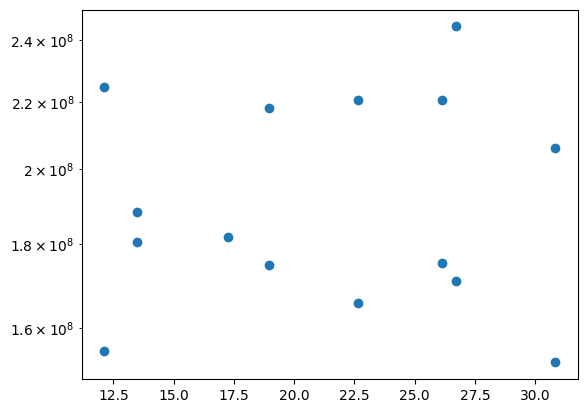

In [145]:
indx = 35
test_file = df_synth["name"][indx]
print(test_file)

x_0 = np.load(df_synth["file"][indx])
df_subset = df_synth[df_synth["name"] == test_file]
print(df_subset)
depths = []
squared_diffs = []
for file, depth in tqdm(zip(df_subset["file"], df_subset["depth"])):
    x = np.load(file)
    squared_diff = np.sum((x - x_0) ** 2)
    squared_diffs.append(squared_diff)
    depths.append(depth)

plt.plot(depths, squared_diffs, "o")
plt.yscale("log")

depth is 13.529595499175365


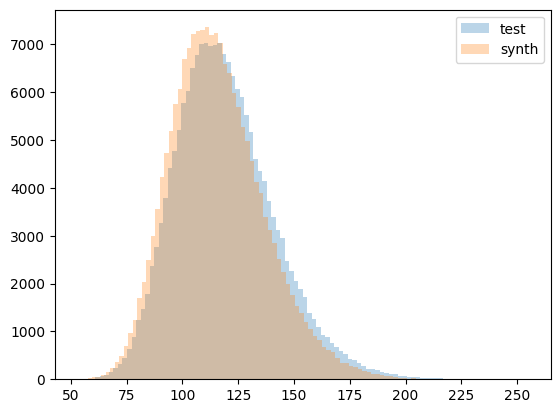

In [111]:

df_synth_subset = df_synth[df_synth["depth"] < 15].reset_index(drop=True)
df_synth_subset = df_synth_subset[df_synth_subset["depth"] > 10].reset_index(drop=True)
indx  = np.random.randint(0, len(df_synth_subset)-1)
plt.hist(np.load(df_test["file"].iloc[0]).flatten(), bins=100, alpha=0.3, label="test") ;
plt.hist(np.load(df_synth_subset["file"].iloc[indx]).flatten(), bins=100, alpha=0.3, label="synth") ;
plt.legend()
print("depth is", df_synth_subset["depth"].iloc[indx])

In [5]:
df_test

,Unnamed: 0,filename,name,preprocessed_filename
0,0,/media/viktor/T7/gravitational-waves-kaggle-20...,00054c878,/media/viktor/T7/gravitational-waves-kaggle-20...
1,1,/media/viktor/T7/gravitational-waves-kaggle-20...,0007285a3,/media/viktor/T7/gravitational-waves-kaggle-20...
2,2,/media/viktor/T7/gravitational-waves-kaggle-20...,00076c5a6,/media/viktor/T7/gravitational-waves-kaggle-20...
3,3,/media/viktor/T7/gravitational-waves-kaggle-20...,001349290,/media/viktor/T7/gravitational-waves-kaggle-20...
4,4,/media/viktor/T7/gravitational-waves-kaggle-20...,001a52e92,/media/viktor/T7/gravitational-waves-kaggle-20...
...,...,...,...,...
7970,7970,/media/viktor/T7/gravitational-waves-kaggle-20...,ffbce04ef,/media/viktor/T7/gravitational-waves-kaggle-20...
7971,7971,/media/viktor/T7/gravitational-waves-kaggle-20...,ffc2d976b,/media/viktor/T7/gravitational-waves-kaggle-20...
7972,7972,/media/viktor/T7/gravitational-waves-kaggle-20...,ffc905909,/media/viktor/T7/gravitational-waves-kaggle-20...
7973,7973,/media/viktor/T7/gravitational-waves-kaggle-20...,ffe276f3e,/media/viktor/T7/gravitational-waves-kaggle-20...
